In [1]:
import sys
import cv2
import numpy as np
import random

from matplotlib import pyplot as plt
%matplotlib inline

def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

In [2]:
def on_trackbar(pos):
    bsize = pos
    if bsize % 2 == 0: bsize = bsize - 1
    if bsize < 3: bsize = 3

    dst = cv2.adaptiveThreshold(src, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY, bsize, 5)

    cv2.imshow('dst', dst)


src = cv2.imread('sudoku.jpg', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

cv2.imshow('src', src)

cv2.namedWindow('dst')
cv2.createTrackbar('Block Size', 'dst', 0, 200, on_trackbar)
cv2.setTrackbarPos('Block Size', 'dst', 11)

cv2.waitKey()
cv2.destroyAllWindows()


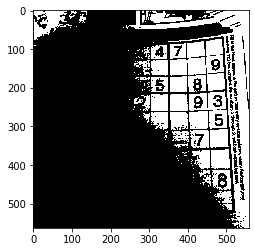

97.0


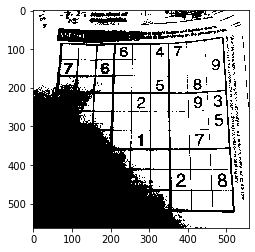

In [11]:
img = cv2.imread('sudoku.jpg', 0)
_, binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
imshow("", binary)

t, binary2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
print(t)
imshow("", binary2)

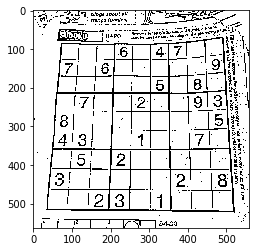

In [15]:
binary3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY, 11, 5)

imshow("", binary3)

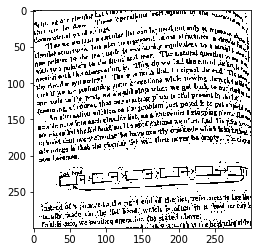

In [18]:
img = cv2.imread('text.jpg', 0)
binary4 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY, 11, 5)
imshow("", binary4)

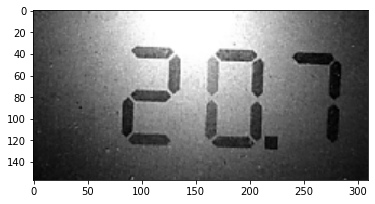

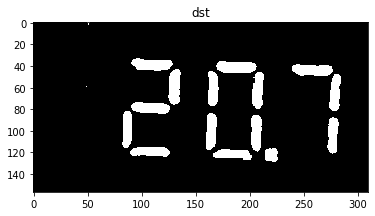

In [63]:
src = cv2.imread('207.png', cv2.IMREAD_GRAYSCALE)
imshow("", src)
src = cv2.GaussianBlur(src, (13, 13), 0)
dst = cv2.adaptiveThreshold(src, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
          cv2.THRESH_BINARY | cv2.THRESH_BINARY_INV, 21, 5)
imshow('dst', dst)

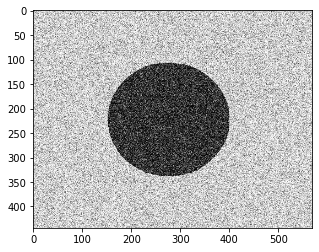

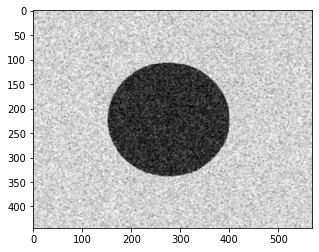

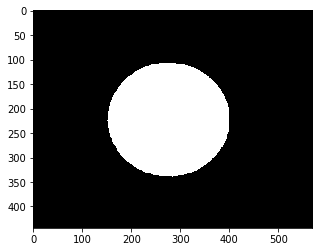

In [54]:
image = cv2.imread('circle.png',0)  
imshow("", image)
img_blur = cv2.GaussianBlur(image, (5,5), 0)
imshow("", img_blur)
_,binary = cv2.threshold(img_blur, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
imshow("", binary)

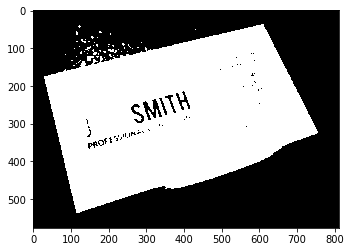

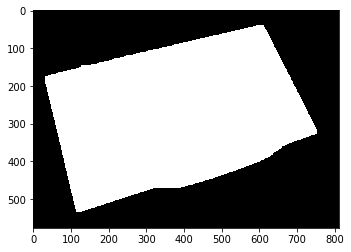

In [69]:
img = cv2.imread('namecard.png', 0)
gray = cv2.GaussianBlur(img, (7, 7), 0)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
_,binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY |  cv2.THRESH_OTSU)

imshow("", binary )
open = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)
closed = cv2.morphologyEx(open, cv2.MORPH_CLOSE, kernel, iterations=10)

imshow("", closed)

In [78]:
cap = cv2.VideoCapture("car-overhead-1.avi")  #tennis_ball.mp4  

fgbg = cv2.createBackgroundSubtractorMOG2(varThreshold=100)

while(1):
    ret, frame = cap.read()

    fgmask = fgbg.apply(frame)

    cv2.imshow('mask',fgmask)
    cv2.imshow('src',frame)

    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()